In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('/kaggle/input/air-quality-data-in-india/air-quality-india.csv')
df.head() 

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50


In [3]:
df.shape

(36192, 6)

This dataset contains 36192 rows and 6 columns.

In [4]:
df['Year'].min()

2017

In [5]:
df['Year'].max()

2022

The min and max value in the dataset is from 2017 to 2022

In [6]:
df.describe()

,Year,Month,Day,Hour,PM2.5
count,36192.000000,36192.000000,36192.000000,36192.000000,36192.000000
mean,2019.682278,6.331841,15.716401,11.477840,49.308429
std,1.345011,3.593321,8.859769,6.925088,24.863511
min,2017.000000,1.000000,1.000000,0.000000,7.020000
25%,2019.000000,3.000000,8.000000,5.000000,28.080000
50%,2020.000000,6.000000,16.000000,11.000000,45.730000
75%,2021.000000,10.000000,23.000000,17.000000,64.520000
max,2022.000000,12.000000,31.000000,23.000000,245.630000


*the above cell gives the information regarding the aggregation values that is the mean , std deviation , min max of the values in the dataset. Also, the col^m labels can be studied  * *italicized text*

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  36192 non-null  object 
 1   Year       36192 non-null  int64  
 2   Month      36192 non-null  int64  
 3   Day        36192 non-null  int64  
 4   Hour       36192 non-null  int64  
 5   PM2.5      36192 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ MB


*above code provides the inforamtion regarding the column labels, null and notnull values and its datatype, from the above code it can be interpretted that , the colms PM2.5 has float64 datatype , while TIMESTAMP has object , and rest are having int64 datatype.*

In [8]:
df.isnull().sum()

Timestamp    0
Year         0
Month        0
Day          0
Hour         0
PM2.5        0
dtype: int64

*there are zero null values in the dataset*



In [9]:
df.notnull().sum()

Timestamp    36192
Year         36192
Month        36192
Day          36192
Hour         36192
PM2.5        36192
dtype: int64

*there are no null values in the dataset.*

In [10]:
df.value_counts()

Timestamp            Year  Month  Day  Hour  PM2.5
2017-11-07 12:00:00  2017  11     7    12    64.51    1
2020-12-07 16:00:00  2020  12     7    16    93.62    1
2020-12-07 10:00:00  2020  12     7    10    64.77    1
2020-12-07 11:00:00  2020  12     7    11    54.93    1
2020-12-07 12:00:00  2020  12     7    12    55.11    1
                                                     ..
2019-05-26 04:00:00  2019  5      26   4     39.87    1
2019-05-26 03:00:00  2019  5      26   3     36.38    1
2019-05-26 02:00:00  2019  5      26   2     36.18    1
2019-05-26 01:00:00  2019  5      26   1     35.94    1
2022-06-04 15:00:00  2022  6      4    15    40.67    1
Length: 36192, dtype: int64

*The Above code value_counts() function return a Series containing counts of unique values in the dataset*

In [11]:
df.dtypes

Timestamp     object
Year           int64
Month          int64
Day            int64
Hour           int64
PM2.5        float64
dtype: object

*the above dataset is giving the type of data in the dataset.*

In [12]:
df['Timestamp'].unique()

array(['2017-11-07 12:00:00', '2017-11-07 13:00:00',
       '2017-11-07 14:00:00', ..., '2022-06-04 13:00:00',
       '2022-06-04 14:00:00', '2022-06-04 15:00:00'], dtype=object)

In [13]:
df.duplicated().sum()

0

*the above code checks, whether , the dataset have any duplicated values or not. Here the dataset has no duplicate values*

In [14]:
df.pivot_table(values='PM2.5', index='Hour', columns='Year').head()

Year,2017,2018,2019,2020,2021,2022
Hour,,,,,,
0,88.248367,50.741093,50.607333,43.163818,44.515159,49.133910
1,87.370833,51.013785,49.126854,42.400057,43.739169,48.435530
2,90.833469,53.184920,49.385732,42.129286,43.961146,49.136316
3,100.352292,57.246440,51.040342,43.680543,45.715747,51.971579
4,108.137755,59.940452,53.655831,45.246866,47.587649,54.564697


*A PivotTable is an interactive way to quickly summarize large amounts of data.*

In [15]:
df['Year'].value_counts()

2020    8356
2021    8283
2019    7685
2018    7537
2022    3194
2017    1137
Name: Year, dtype: int64

*The above code gives the total number of values in the form of their counts in the dataset.*

<AxesSubplot:xlabel='Month', ylabel='PM2.5'>

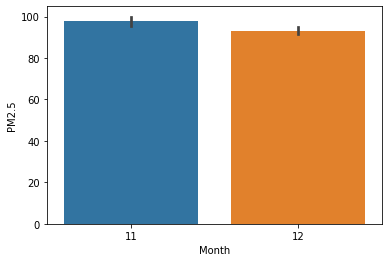

In [16]:
df2017=df[df['Year']==2017]
sns.barplot(x='Month', y='PM2.5', data=df2017)

*AS the values for 2017, is less as compaired to other data provided . we will further will not give much importance to year 2017, and we will not consider it Majorly For our study. *

<AxesSubplot:xlabel='Year', ylabel='Hour'>

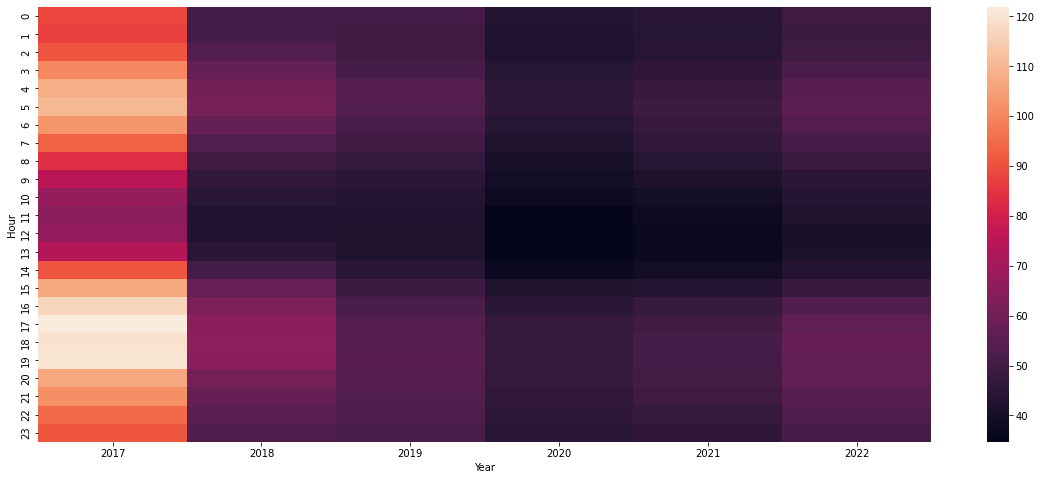

In [17]:
fig,axes=plt.subplots(figsize=(20,8))
da=df.pivot_table(values='PM2.5', index='Hour', columns='Year')
sns.heatmap(da,ax=axes)


*The above heatmap, conveys that the data for 2017 is in-sufficient , hence we would only use the data from 2018 to 2020, where we can conclude that the PM levels were low in 2020 & 2021 , while year 2018 and 2022 are having the highest pollution levels and year 2019 is having moderate pollution levels.*

<AxesSubplot:xlabel='Year'>

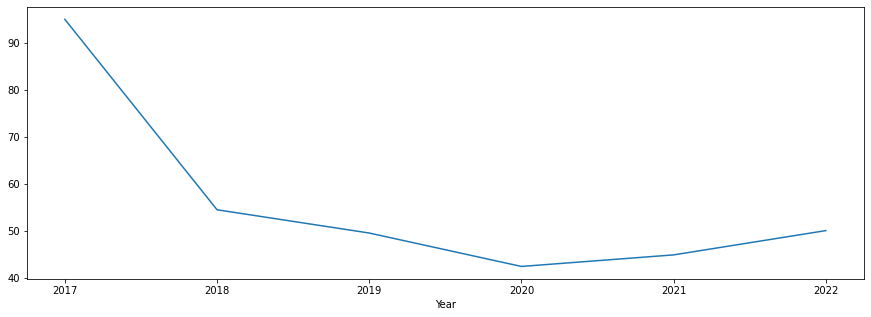

In [18]:
fig,axes=plt.subplots(figsize=(15,5))
df.groupby('Year')['PM2.5'].mean().plot()

*The above plot is the line plot where we can conclude that the year 2020 is having the lowest pollution levels, due to aftermath of nationwide lockdown due to the pendemic COVID - 19 which is steadly in increaing pattern  post 2020 due to lift in lockdown , in phased manner.year 2018 had the highest pollution levels*

<AxesSubplot:xlabel='Month', ylabel='PM2.5'>

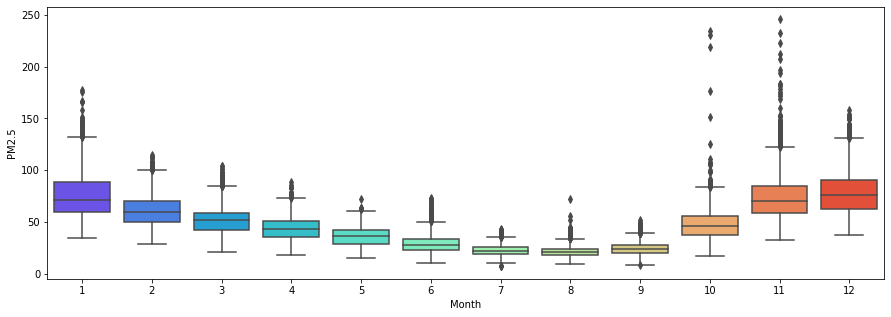

In [19]:
fig,axes=plt.subplots(figsize=(15,5))
sns.boxplot(x="Month", y="PM2.5", data=df, palette='rainbow')

*The above boxplots provides the outliner values in the dataset, having highest in the month of no 10,11 and lowest in the month of 5,6,7,8.*

<AxesSubplot:xlabel='Month', ylabel='PM2.5'>

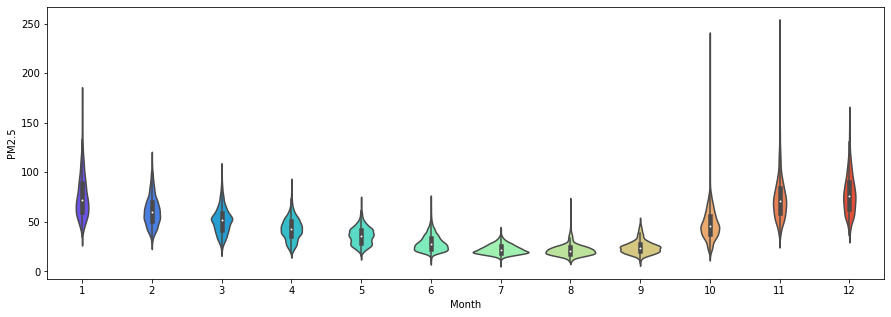

In [20]:
fig,axes=plt.subplots(figsize=(15,5))
sns.violinplot(x="Month", y="PM2.5", data=df, palette='rainbow')

*The above violineplot provides the outliner values in the dataset, having highest in the month of no 10,11 and lowest in the month of 5,6,7,8*.

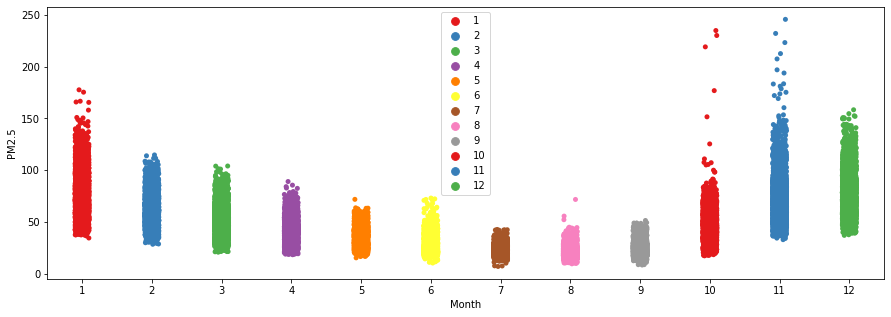

In [21]:
fig,axes=plt.subplots(figsize=(15,5))
sns.stripplot(x="Month", y="PM2.5", data=df, jitter=True, hue='Month', palette='Set1')
plt.legend(loc='upper center')

*The above stripplot conveys that in the dataset,is having highest amount of pollution in the month of no 10,11 and lowest in the month of 5,6,7,8.*

<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

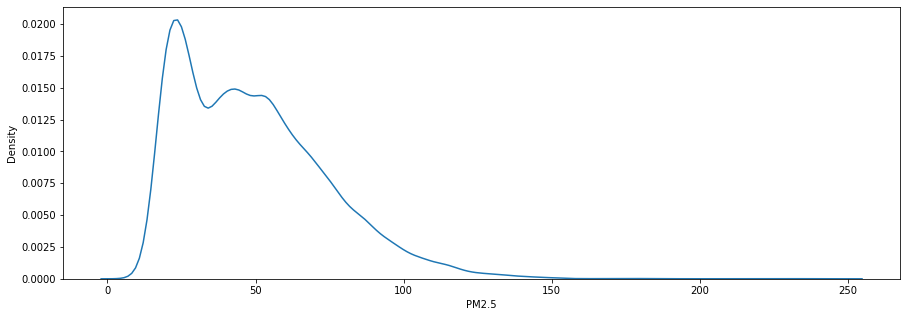

In [22]:
fig,axes=plt.subplots(figsize=(15,5))
sns.kdeplot(df['PM2.5'])

*the above plot is KDE POLT , which provides the frequency of PM2.5 matter across the data set in years 2017 to 2022, where PM2.5 Of 35 is highest, 45 being the 2 nd highest, which goes on decreasing in the steadily pattern,where 255 being the lowest.*

<AxesSubplot:xlabel='Month', ylabel='PM2.5'>

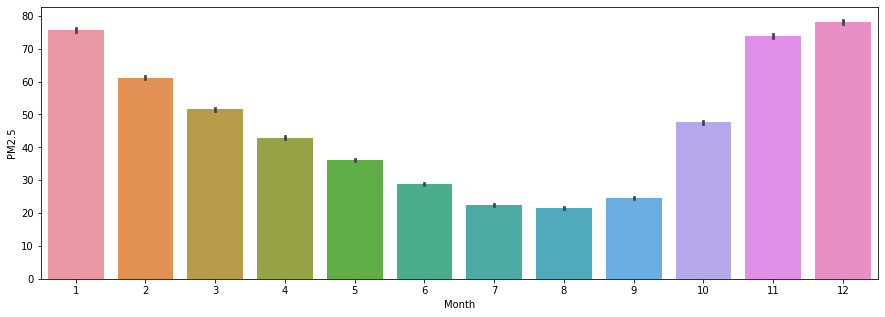

In [23]:
# fig,axes=plt.subplots(figsize=(15,5))
plt.figure(figsize=(15,5))
sns.barplot(x='Month', y='PM2.5', data=df)

*The above code written is for the bar graph,for which dataset values are provided , on which MONTH in nos is on x -axis and PM2.5 is on Y axis.The bar graph gives the overall distribution of polution levels in terms of PM 2.5 over the Months in India*.  

**INSIGHTS FROM THE DATASET / OVER ALL CONCLUSION AFTER STUDYING THE DATA**

After Analyzing graph through the given dataset, we can say that,

1.  In INDIA from month of  octobar,marks the beginning of winter season where the temperture ranges from 2 degrees to 30 degree centegrate throughout the lenght  and breadth of country. 


2. where the majority of the region is free from any moisture and the season is absolutly dry. 


3. With** burning of paddy fields** to prepare the farms for Rabi crop and  **Diwali festival**, India sees **large amount of pollution** hence increase in PM 2.5


4. Therefore,the Months,10,11,12,1** ( Octobar TO January ) Sees high amount of PM 2.5 Matter.**


5. India also witness strong ,** South-West Moonsoon Winds ( Rainfall )** , in the Months 6,7,8,9( June TO  September ), where most of the** region is wet** and s**ees less amount of PM2.5 matters.**


6. Remaining Months 2,3,4,5 **( Feburary To May )** India , witness Hrash Summer, with clear skies, and** medium amount of Forests Fires**, hence the **PM2.5 levels are moderate.**






SPECIAL CASE ----**  COVID - 19 Pendamic**
  
*  As, we all know , India too went into complete lockdown in year 2020 , for majority of months,therefore the PM2.5 levels in the country dropped by considerable amount.Hence , Year 2020 saw dip in PM2.5 amount*

***CHECK , TO SUPPORT THE  CONCLUSION PROVIDED ABOVE***

*Here, A check is provided , to see , wheather, the PM2.5 levels are influenced by indian weather pattern or Not. OR Influenced by the SPECIAL CASE of covid 19 where lockdown was implemented.*


In [24]:
df2=df.copy()
df2.head()

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50


In [25]:
df2020=df2[df2['Year']==2020]

<AxesSubplot:xlabel='Month', ylabel='PM2.5'>

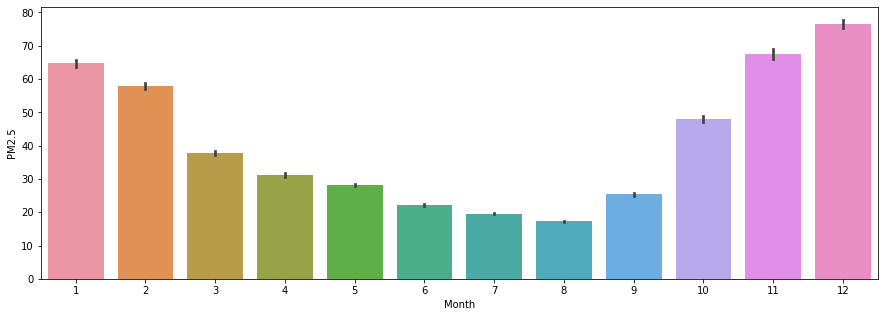

In [26]:
# for year 2020 only
plt.figure(figsize=(15,5))
sns.barplot(x='Month', y='PM2.5', data=df2020)

*Bar Graph for 2020 in months EXCLUDING OTHER YEARS.*

In [27]:
df2020=df2[df2['Year']!=2020]

<AxesSubplot:xlabel='Month', ylabel='PM2.5'>

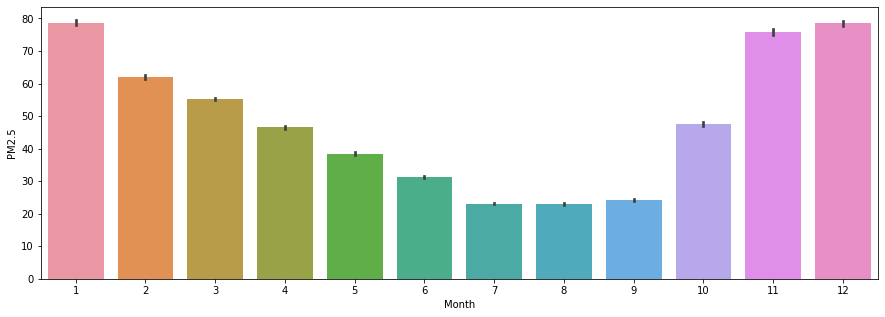

In [28]:
# for all the years except 2020
plt.figure(figsize=(15,5))
sns.barplot(x='Month', y='PM2.5', data=df2020)

*Bar Graph for 2017 to 2022 in months EXCEPT 2020*

<AxesSubplot:xlabel='Year', ylabel='PM2.5'>

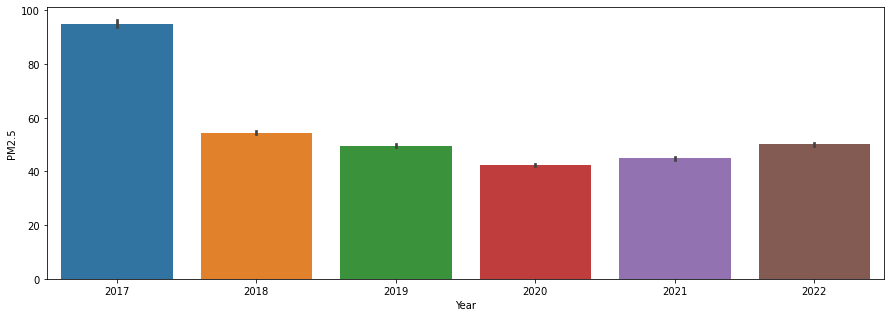

In [29]:
# all year data
plt.figure(figsize=(15,5))
sns.barplot(x='Year', y='PM2.5', data=df)

*The above bar graph provides the overall PM 2.5  levels , over the years , where it can be seen that year 2020 has the lowest PM2.5 levels. *


1.  From , here we can easily conclude that, the pollution pattern in India in the form of PM 2.5 , is majorly influenceed, **by the weather pattern** 

2. Except for the year 2020 where India witnessed a nationwide lockdown , due to onset of covid-19.

3.  
 Hence the PM2.5 matter for that particular year was lower as compared to 
all other years given in the  dataset.
